In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
df = pd.read_csv('data/tmdb-movies.csv')


In [2]:
df['profit']= df['revenue'] - df['budget']
df[df['budget']!=0]
df[df['revenue']!=0]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10822,396,tt0061184,0.670274,7500000,33736689,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,NaN,Mike Nichols,You are cordially invited to George and Martha...,...,131,Drama,Chenault Productions,6/21/66,74,7.5,1966,5.038511e+07,2.266436e+08,26236689
10828,5780,tt0061107,0.402730,3000000,13000000,Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,NaN,Alfred Hitchcock,It tears you apart with suspense!,...,128,Mystery|Thriller,Universal Pictures,7/13/66,46,6.3,1966,2.015404e+07,8.733419e+07,10000000
10829,6644,tt0061619,0.395668,4653000,6000000,El Dorado,John Wayne|Robert Mitchum|James Caan|Charlene ...,NaN,Howard Hawks,It's the Big One with the Big Two,...,120,Action|Western,Paramount Pictures|Laurel Productions,12/17/66,36,6.9,1966,3.125892e+07,4.030809e+07,1347000
10835,5923,tt0060934,0.299911,12000000,20000000,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,NaN,Robert Wise,This is the heroic story of the men on the U.S...,...,182,Action|Adventure|Drama|War|Romance,Twentieth Century Fox Film Corporation|Solar P...,12/20/66,28,7.0,1966,8.061618e+07,1.343603e+08,8000000


In [3]:
df.drop(['imdb_id','homepage','tagline','keywords','overview','runtime', 'production_companies', 'release_date', 'budget_adj', 'revenue_adj'],axis =1 ,inplace=True)

In [4]:
df['budget'] = df['budget'].replace(0, np.NaN)
df['revenue'] = df['revenue'].replace(0, np.NaN)

In [5]:
df = df.dropna(subset=['cast', 'director', 'genres', 'budget', 'revenue'])

In [6]:
correlation = df["popularity"].corr(df["budget"])

correlation 

0.4465702124386731

In [7]:
df.sort_values(by=['profit'], ascending=False, inplace=True)

# Top 10 Most Profitable Movies

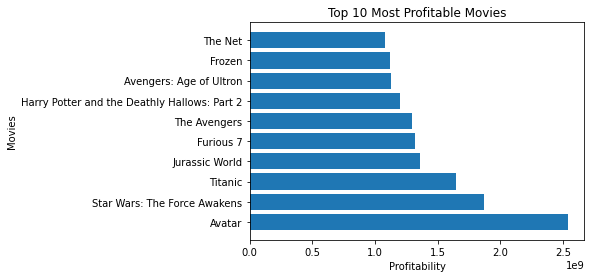

In [8]:
x = list(df['original_title'].head(10))
y = list(df['profit'].head(10))
plt.barh(x,y)
plt.title('Top 10 Most Profitable Movies')
plt.ylabel('Movies')
plt.xlabel('Profitability')
plt.show()

In [9]:
top10 = df.iloc[0:10]
top10

,id,popularity,budget,revenue,original_title,cast,director,genres,vote_count,vote_average,release_year,profit
1386,19995,9.432768,237000000.0,2.781506e+09,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Action|Adventure|Fantasy|Science Fiction,8458,7.1,2009,2544505847
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1868178225
5231,597,4.355219,200000000.0,1.845034e+09,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,Drama|Romance|Thriller,4654,7.3,1997,1645034188
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1363528810
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,2947,7.3,2015,1316249360
4361,24428,7.637767,220000000.0,1.519558e+09,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,Science Fiction|Action|Adventure,8903,7.3,2012,1299557910
3374,12445,5.711315,125000000.0,1.327818e+09,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,David Yates,Adventure|Family|Fantasy,3750,7.7,2011,1202817822
14,99861,5.944927,280000000.0,1.405036e+09,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,Action|Adventure|Science Fiction,4304,7.4,2015,1125035767
5422,109445,6.112766,150000000.0,1.274219e+09,Frozen,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,Animation|Adventure|Family,3369,7.5,2013,1124219009
8094,1642,1.136610,22000000.0,1.106280e+09,The Net,Sandra Bullock|Jeremy Northam|Dennis Miller|We...,Irwin Winkler,Crime|Drama|Mystery|Thriller|Action,201,5.6,1995,1084279658


# Which genres have the highest profit?

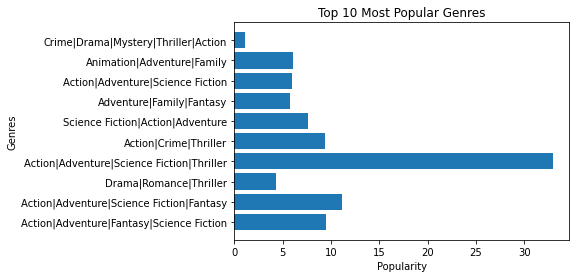

In [10]:
x = list(df['genres'].head(10))
y = list(df['popularity'].head(10))
plt.barh(x,y)
plt.title('Top 10 Most Popular Genres')
plt.ylabel('Genres')
plt.xlabel('Popularity')
plt.show()

# Plot profit vs budget

Text(0.5, 1.0, 'Profit vs Budget for movies')

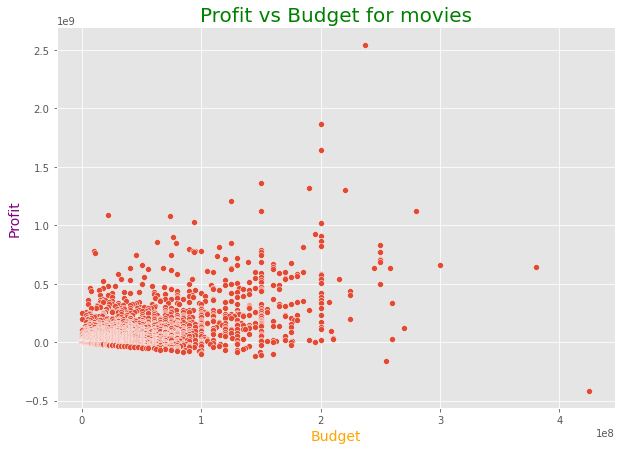

In [11]:
plt.style.use("ggplot")
plt.figure(figsize=[10,7])
sns.scatterplot(data=df,x="budget",y="profit");
plt.xlabel("Budget",fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'Orange'})
plt.ylabel("Profit",fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'Purple'})
plt.title("Profit vs Budget for movies",fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

# Movie with Highest And Lowest Budget

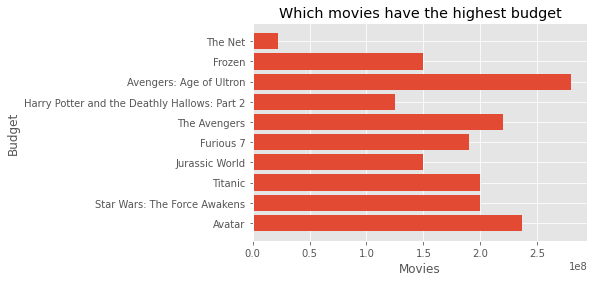

In [12]:
x = list(df['original_title'].head(10))
y = list(df['budget'].head(10))
plt.barh(x,y)
plt.title('Which movies have the highest budget')
plt.ylabel('Budget')
plt.xlabel('Movies')
plt.show()

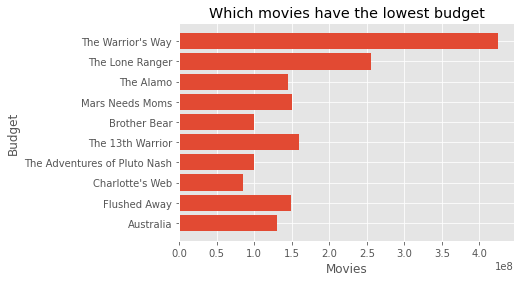

In [13]:
x = list(df['original_title'].tail(10))
y = list(df['budget'].tail(10))
plt.barh(x,y)
plt.title('Which movies have the lowest budget')
plt.ylabel('Budget')
plt.xlabel('Movies')
plt.show()

In [92]:
data = df.sort_values(by='budget', ascending=False)

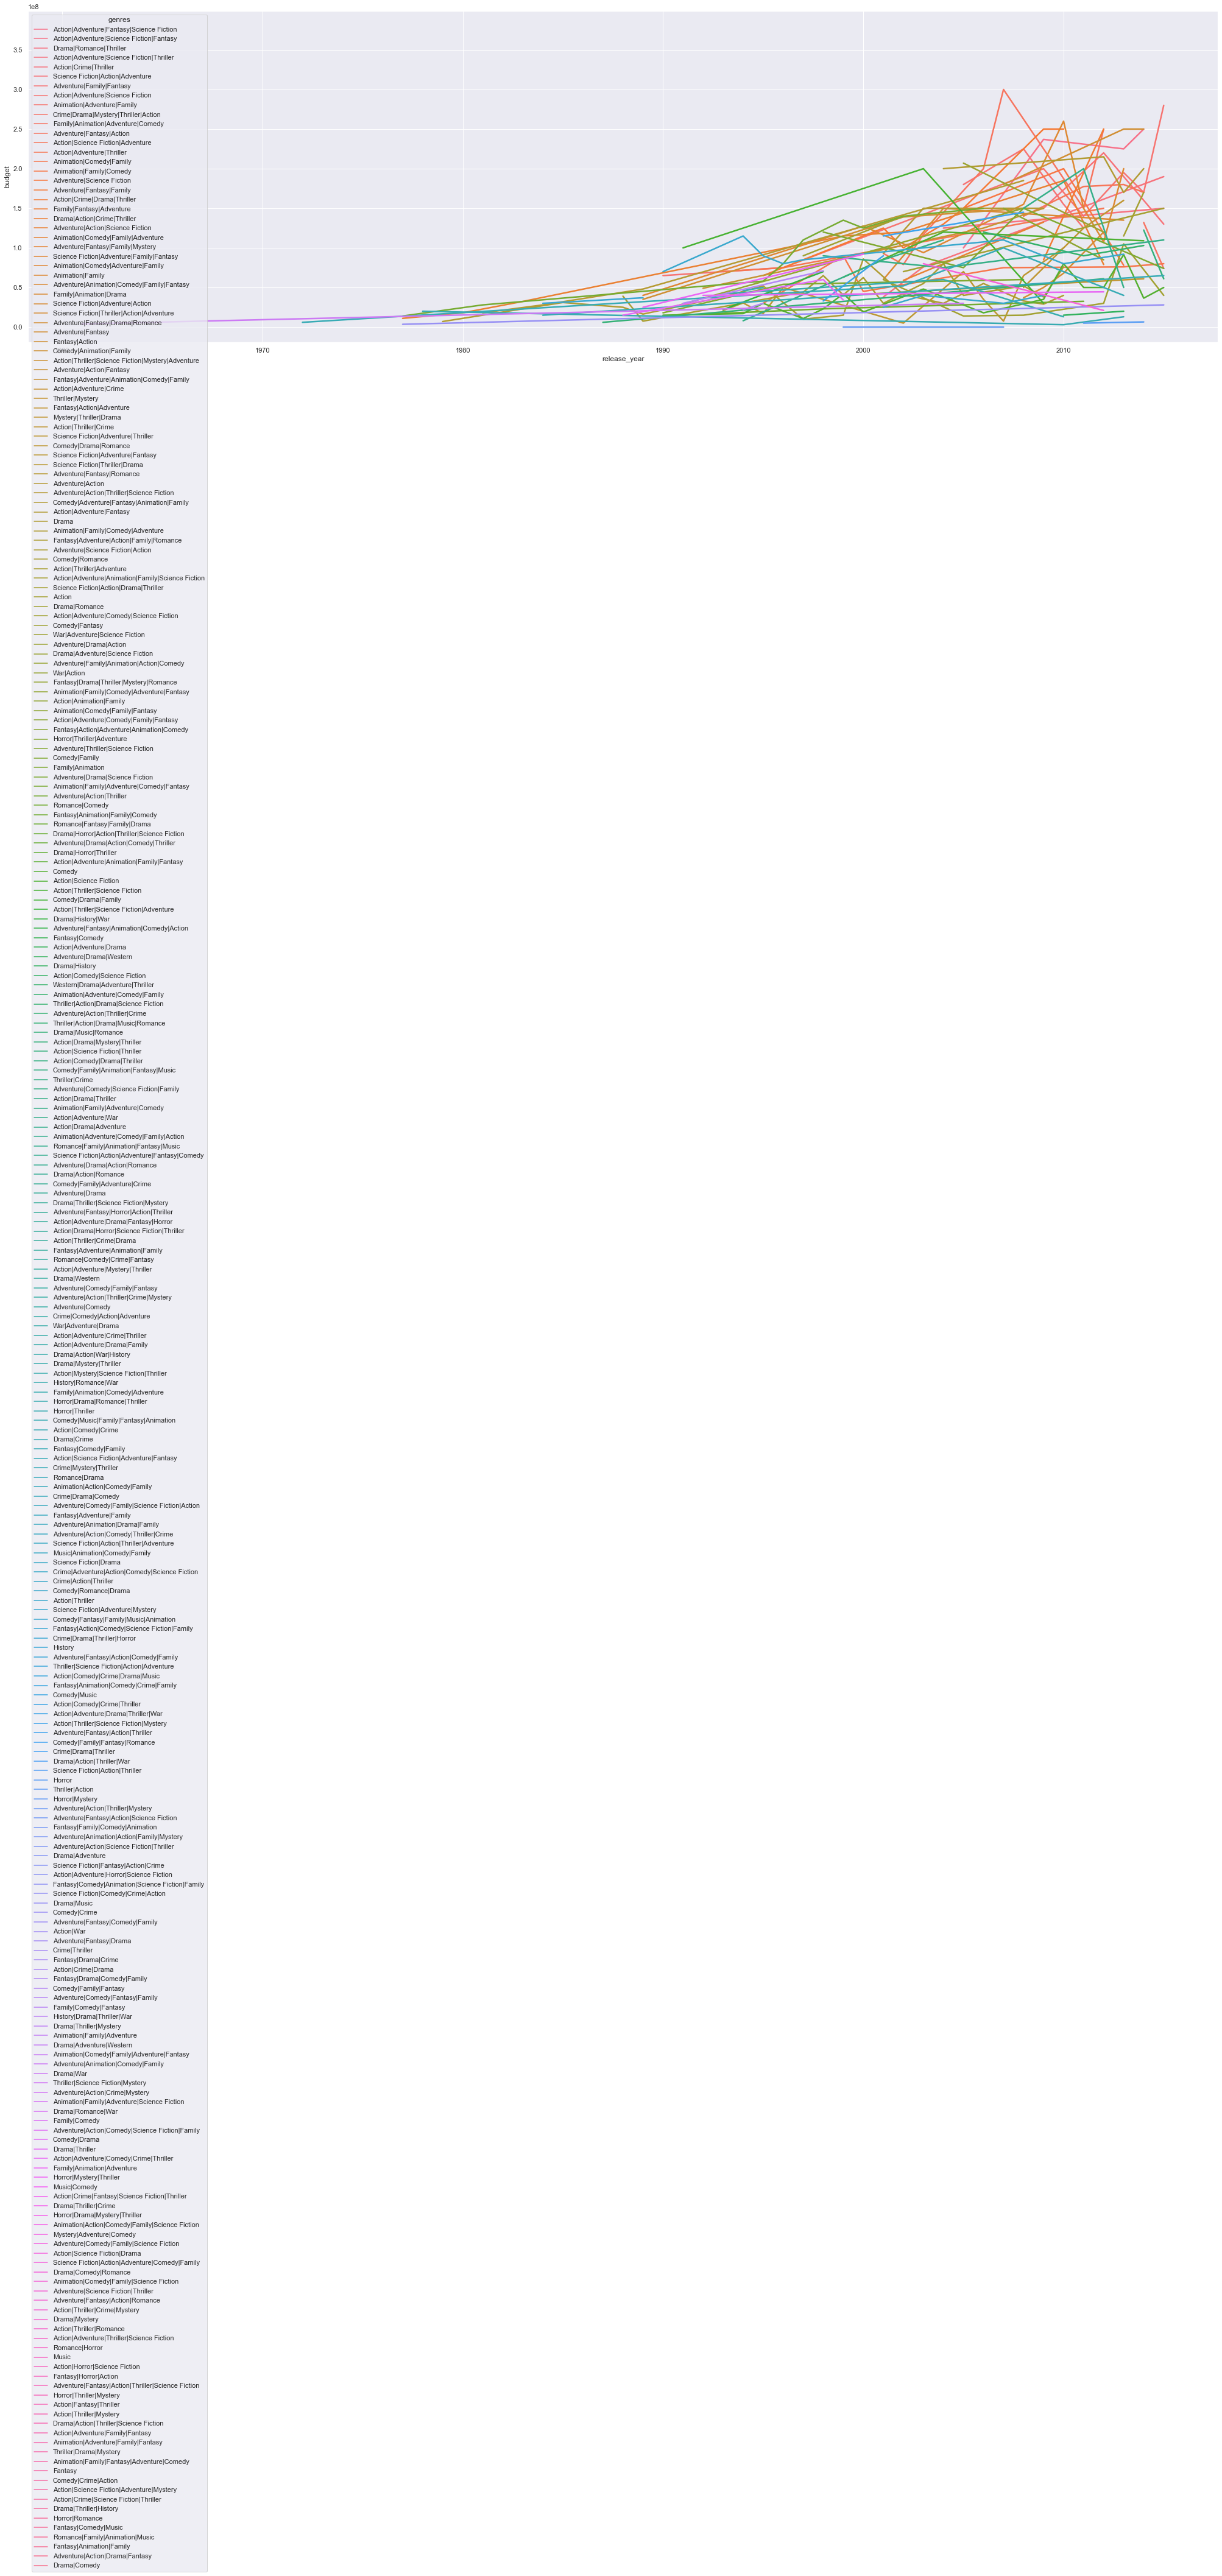

In [102]:
x = sns.lineplot(data=df.head(500), x="release_year", y="budget", hue="genres", err_style="bars", ci=10, linewidth=2.5)

In [15]:
df.popularity.median()

0.798343

In [16]:
popular_genres = df.loc[df["popularity"] > 0.798343, "genres"]
popular_genres.head(20)

1386      Action|Adventure|Fantasy|Science Fiction
3         Action|Adventure|Science Fiction|Fantasy
5231                        Drama|Romance|Thriller
0        Action|Adventure|Science Fiction|Thriller
4                            Action|Crime|Thriller
4361              Science Fiction|Action|Adventure
3374                      Adventure|Family|Fantasy
14                Action|Adventure|Science Fiction
5422                    Animation|Adventure|Family
8094           Crime|Drama|Mystery|Thriller|Action
8                Family|Animation|Adventure|Comedy
4949                      Adventure|Fantasy|Action
5425              Action|Adventure|Science Fiction
4365                     Action|Adventure|Thriller
5434                       Animation|Comedy|Family
6555                      Adventure|Fantasy|Action
1930                       Animation|Family|Comedy
10223                    Adventure|Science Fiction
2634                      Adventure|Fantasy|Family
3911                      Adven

In [17]:
df['popularity'].values.argsort(axis=0)
df.iloc[df['popularity'].values.argsort(axis=0)]

,id,popularity,budget,revenue,original_title,cast,director,genres,vote_count,vote_average,release_year,profit
7268,1392,0.001117,350000.0,3.515061e+06,Born into Brothels,Zana Briski|Avijit|Geeta Masi|Kochi|Mamuni,Zana Briski|Ross Kauffman,Documentary,23,6.4,2004,3165061
6065,203793,0.010335,30000000.0,6.812952e+07,Ð¡Ñ‚Ð°Ð»Ð¸Ð½Ð³Ñ€Ð°Ð´,Thomas Kretschmann|Yanina Studilina|Philippe R...,Fyodor Bondarchuk,War|Action,64,5.5,2013,38129518
8066,26978,0.015727,15000000.0,1.650000e+07,Spacehunter: Adventures in the Forbidden Zone,Peter Strauss|Molly Ringwald|Michael Ironside|...,Lamont Johnson,Adventure|Science Fiction,17,5.1,1983,1500000
8883,36047,0.015997,15000000.0,5.217498e+06,The In Crowd,Susan Ward|Lori Heuring|Matthew Settle|Nathan ...,Mary Lambert,Thriller,12,5.2,2000,-9782502
10218,23479,0.017498,35000000.0,3.532329e+07,The Bad News Bears,Walter Matthau|Tatum O'Neal|Christopher Daniel...,Michael Ritchie,Comedy|Family,54,6.6,1976,323292
...,...,...,...,...,...,...,...,...,...,...,...,...
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,2480,6.3,2015,185238201
630,118340,14.311205,170000000.0,7.733124e+08,Guardians of the Galaxy,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,James Gunn,Action|Science Fiction|Adventure,5612,7.9,2014,603312399
629,157336,24.949134,165000000.0,6.217525e+08,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,Adventure|Drama|Science Fiction,6498,8.0,2014,456752480
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,228436354


In [18]:
#df.loc[0:2,['popularity','genres']]

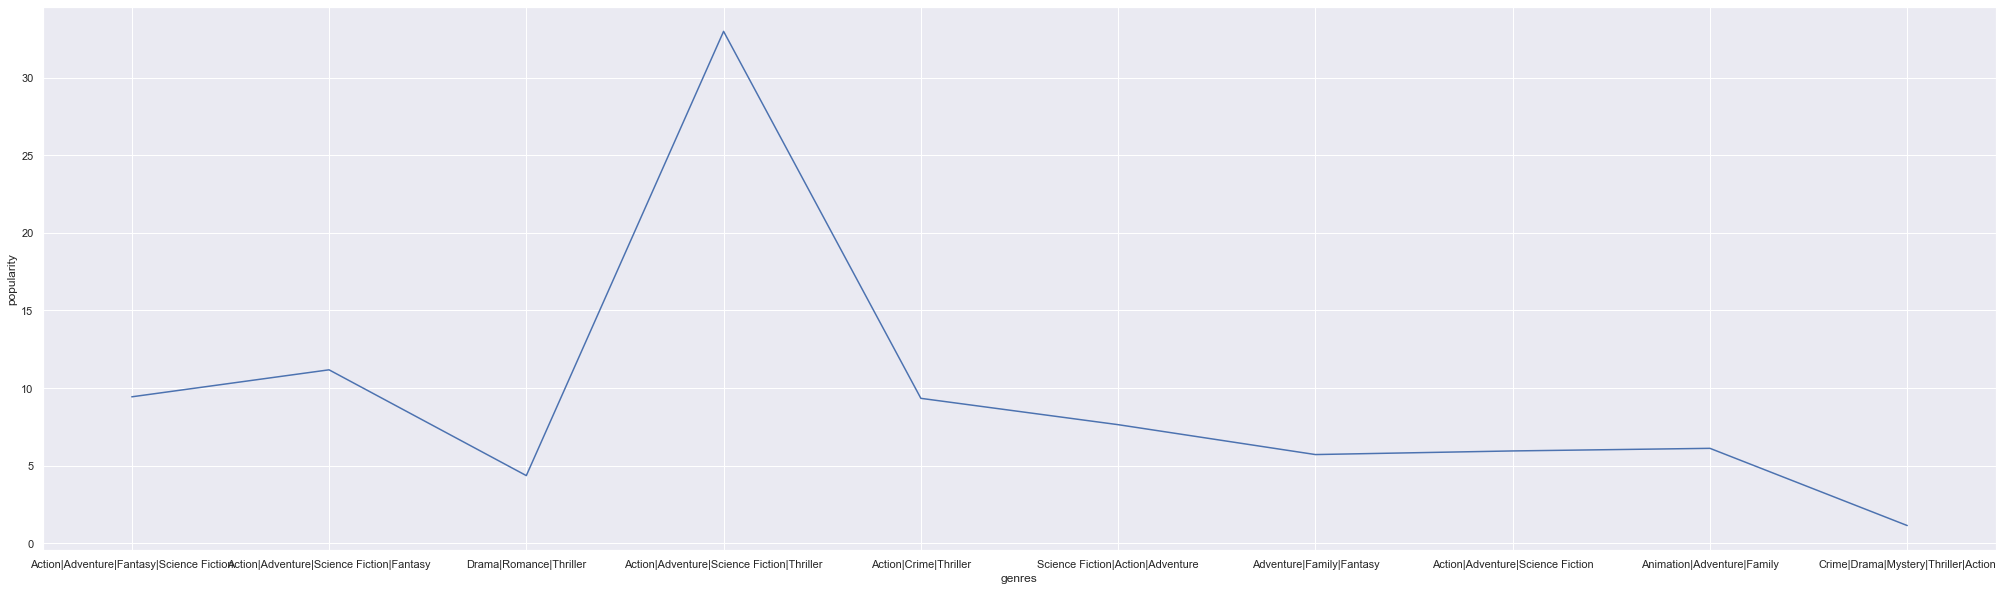

In [55]:
genres = sorted(df.genres)

ax = sns.lineplot(x='genres', y='popularity', data = df.head(10))
sns.set(rc={'figure.figsize':(35,10)})

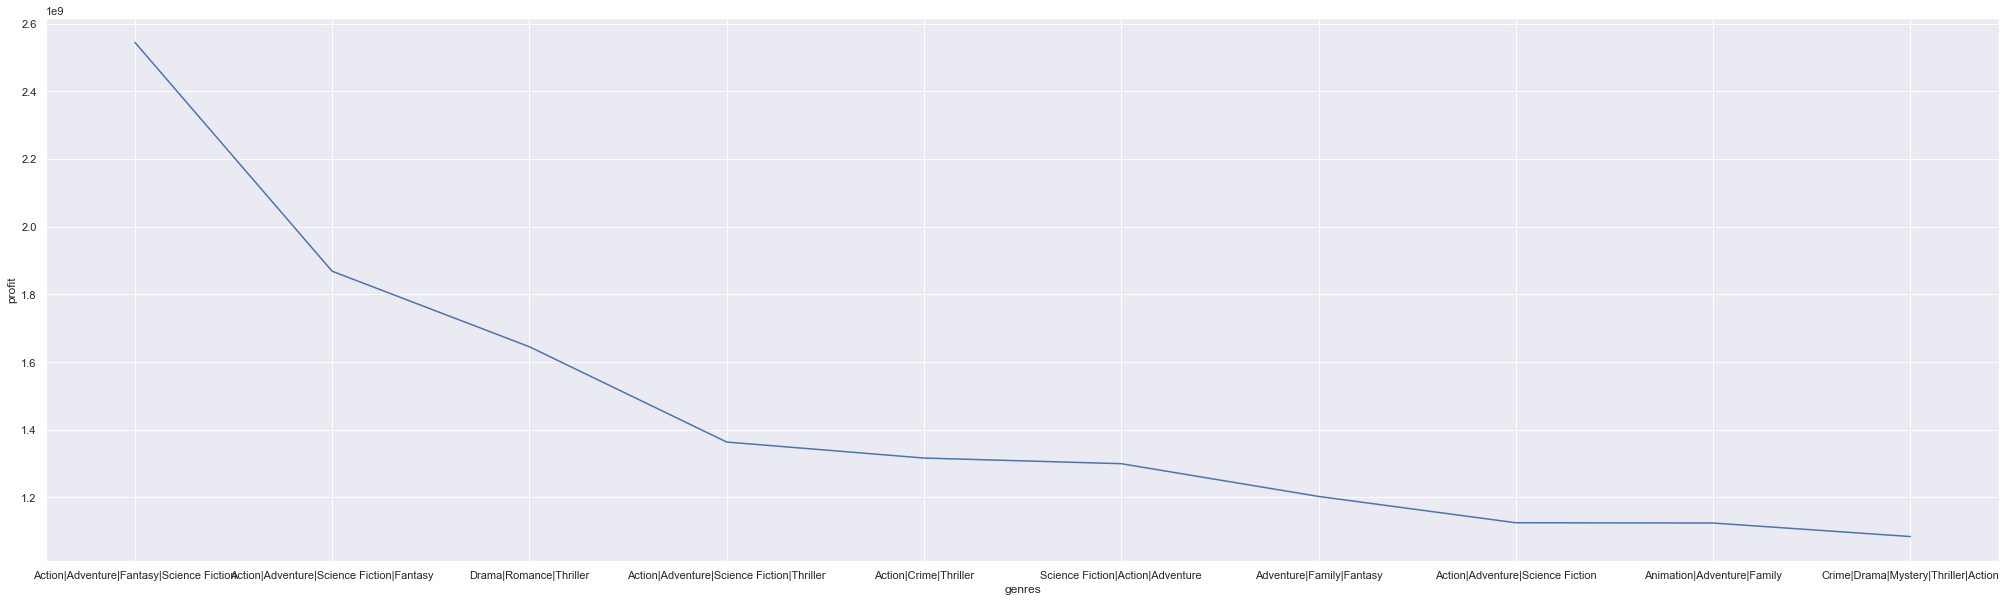

In [20]:
ax = sns.lineplot(x='genres', y='profit', data = df.head(10))
sns.set(rc={'figure.figsize':(35,10)})

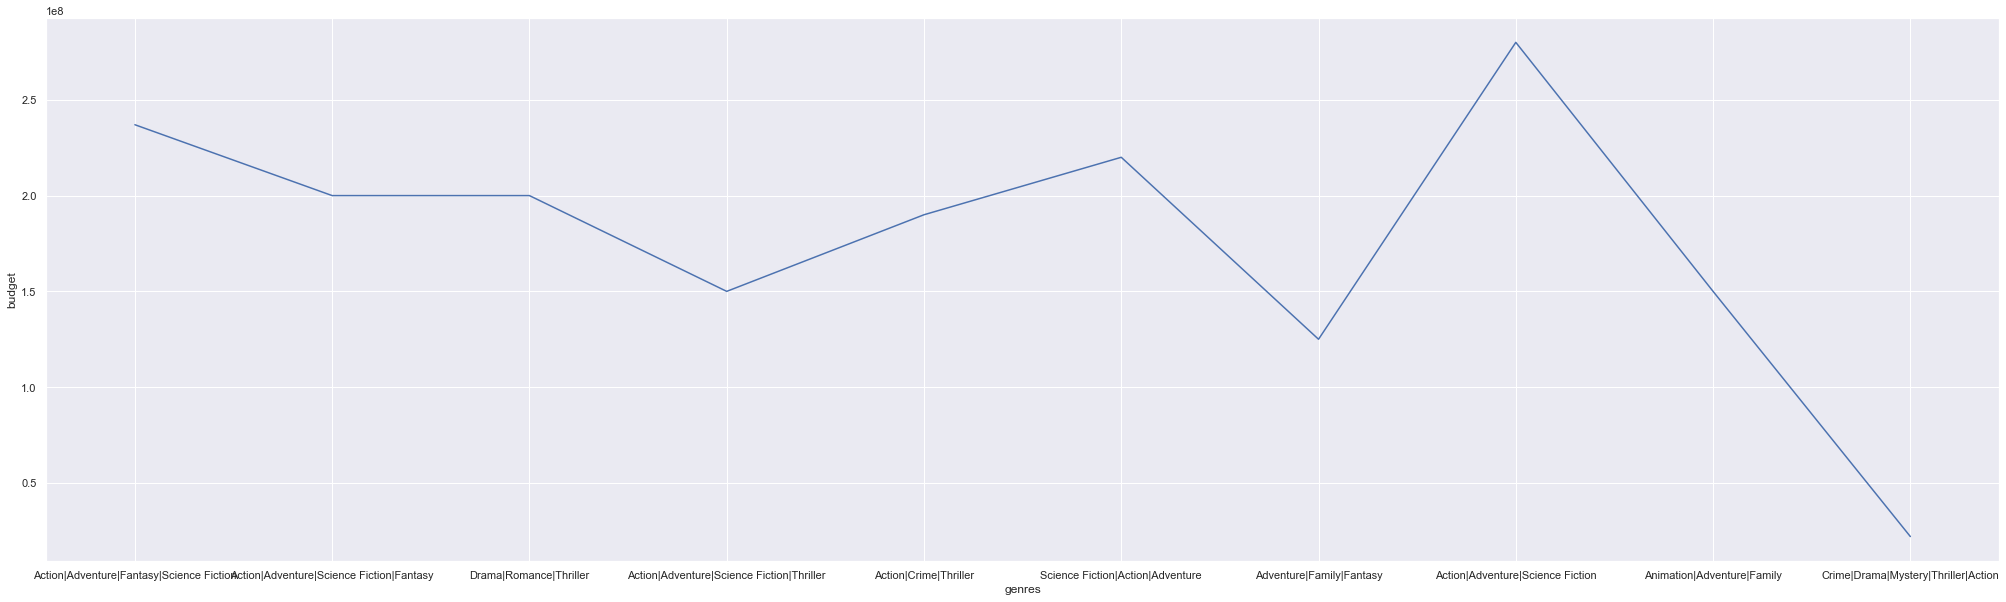

In [21]:
ax = sns.lineplot(x='genres', y='budget', data = df.head(10))
sns.set(rc={'figure.figsize':(35,10)})

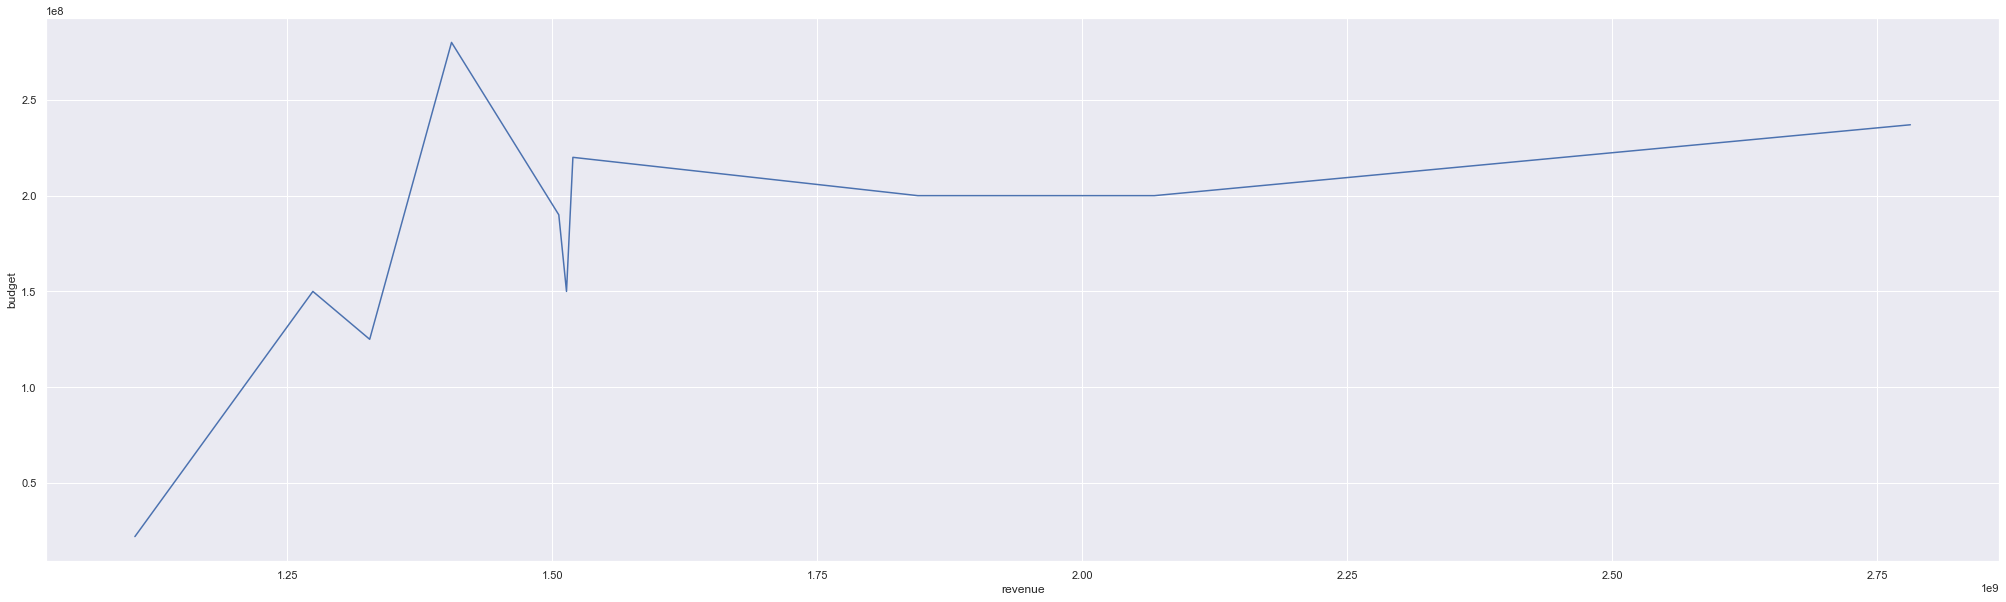

In [22]:
ax = sns.lineplot(x='revenue', y='budget', data = df.head(10))
sns.set(rc={'figure.figsize':(35,10)})

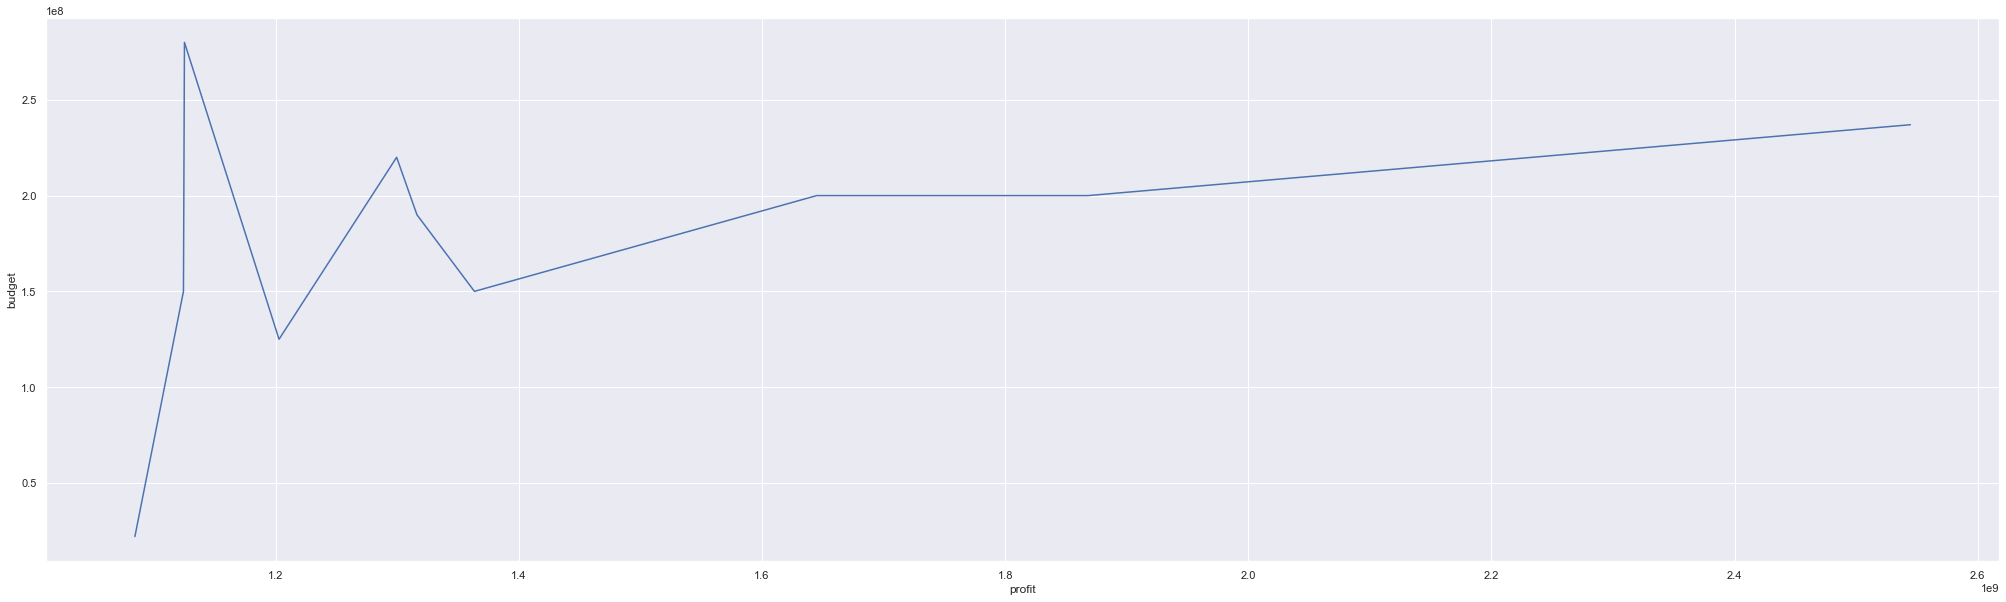

In [23]:
ax = sns.lineplot(x='profit', y='budget', data = df.head(10))
sns.set(rc={'figure.figsize':(35,10)})

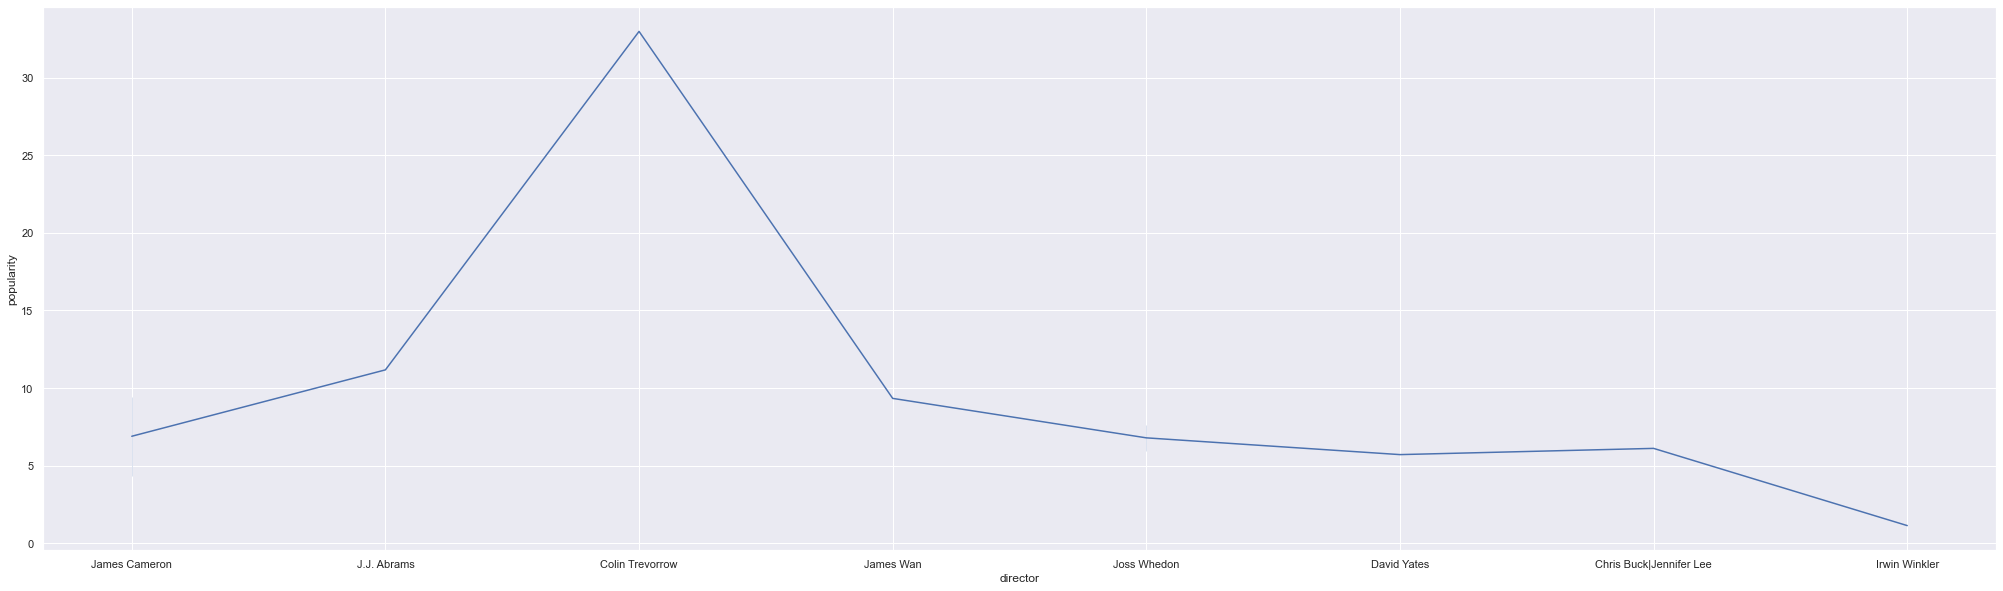

In [53]:
ax = sns.lineplot(x='director', y='popularity', data = df.head(10))
sns.set(rc={'figure.figsize':(35,10)})

In [80]:
popular_genres = df.loc[df["popularity"] > 0.798343, "genres"]
popular_genres.head(20)

1386      Action|Adventure|Fantasy|Science Fiction
3         Action|Adventure|Science Fiction|Fantasy
5231                        Drama|Romance|Thriller
0        Action|Adventure|Science Fiction|Thriller
4                            Action|Crime|Thriller
4361              Science Fiction|Action|Adventure
3374                      Adventure|Family|Fantasy
14                Action|Adventure|Science Fiction
5422                    Animation|Adventure|Family
8094           Crime|Drama|Mystery|Thriller|Action
8                Family|Animation|Adventure|Comedy
4949                      Adventure|Fantasy|Action
5425              Action|Adventure|Science Fiction
4365                     Action|Adventure|Thriller
5434                       Animation|Comedy|Family
6555                      Adventure|Fantasy|Action
1930                       Animation|Family|Comedy
10223                    Adventure|Science Fiction
2634                      Adventure|Fantasy|Family
3911                      Adven

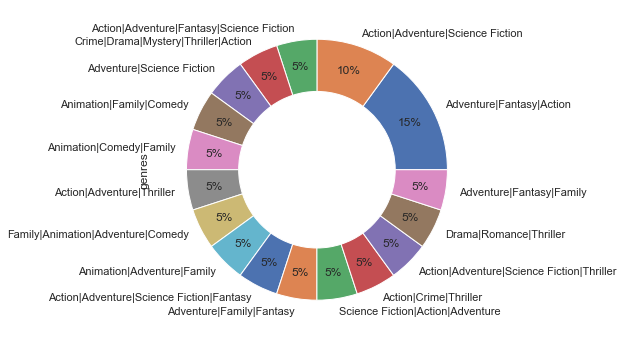

In [81]:
popular_genres.head(20).value_counts().plot.pie(autopct="%.0f%%",figsize=(6,6),pctdistance=0.8,wedgeprops=dict(width=0.4))
plt.show()

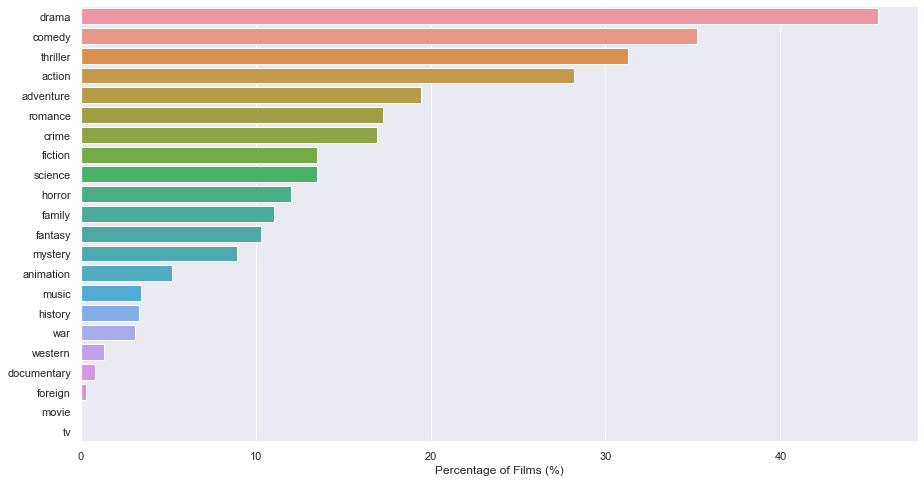

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
temp = df.genres.dropna()
vec = CountVectorizer(token_pattern='(?u)\\b[\\w-]+\\b', analyzer='word').fit(temp)
bag_of_genres = vec.transform(temp)
unique_genres =  vec.get_feature_names()
np.array(unique_genres)

genres = pd.DataFrame(bag_of_genres.todense(),columns=unique_genres,index=temp.index)
sorted_genres_perc = 100*pd.Series(genres.sum()).sort_values(ascending=False)/genres.shape[0]
plt.figure(figsize=(15,8))
sns.barplot(x=sorted_genres_perc.values,y=sorted_genres_perc.index,orient="h")
plt.xlabel("Percentage of Films (%)")
plt.show()

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
temp = df.director.dropna()
vec = CountVectorizer(token_pattern='(?u)\\b[\\w-]+\\b', analyzer='word').fit(temp)
bag_of_director = vec.transform(temp)
unique_director = vec.get_feature_names()
np.array(unique_director)

array(['a', 'aarniokoski', 'aaron', ..., 'zwigoff', 'ã', 'ãlex'],
      dtype='<U16')

In [66]:
director = df.director.unique()

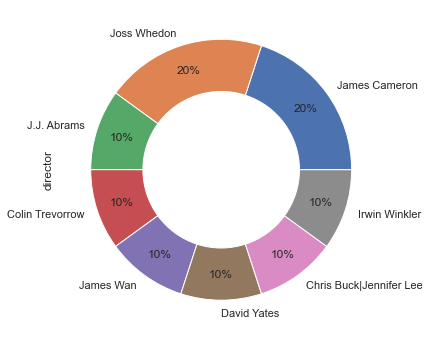

In [68]:
df.director.head(10).value_counts().plot.pie(autopct="%.0f%%",figsize=(6,6),pctdistance=0.8,wedgeprops=dict(width=0.4))
plt.show()